In [ ]:
import pandas as pd
import seaborn as sns
#pip install altair, pip install vega
import altair as alt
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("../data/processed/cleaned_imputed_anime.csv", index_col=0)
df

anime_id                                              name  \
0       17467.0                         Otoko Ippiki Gaki Daishou   
1       37007.0                                           Unknown   
2        5702.0  Sora wo Miageru Shoujo no Hitomi ni Utsuru Sekai   
3       26147.0                                 Nagasaki no Kouma   
4       22247.0                                   Azumi Mamma★Mia   
...         ...                                               ...   
17684    1862.0                                Strike Witches OVA   
17685   56746.0                                           Unknown   
17686   26099.0                                    Hidamari no Ie   
17687   22675.0                Peeping Life: Gekijou Original-ban   
17688   21497.0                  Sengoku Musou SP: Sanada no Shou   

                                              genre     type  episodes  \
0                            Action, Drama, Shounen       TV     156.0   
1                                           Unknown  Unknown       0.0   
2      Action, Fantasy, Magic, Romance, Super Power       TV       9.0   
3                                  Historical, Kids    Movie       1.0   
4                                      Comedy, Kids       TV      60.0   
...                                             ...      ...       ...   
17684        Action, Ecchi, Magic, Military, Sci-Fi      OVA       1.0   
17685                                       Unknown  Unknown       0.0   
17686                                   Drama, Kids      OVA       1.0   
17687                         Comedy, Slice of Life    Movie       5.0   
17688                   Action, Historical, Samurai  Special       1.0   

         rating       members                 themes demographics  \
0      7.200000    158.000000            Delinquents      Shounen   
1      6.208692   3486.114429  Combat Sports, School      Shounen   
2      7.270000  24799.000000            Super Power      Unknown   
3      7.330000     50.000000                Unknown      Unknown   
4      5.600000    101.000000                Unknown      Unknown   
...         ...           ...                    ...          ...   
17684  6.290000  18236.000000               Military      Unknown   
17685  5.327455    197.398998           Idols (Male)      Unknown   
17686  7.000000     65.000000                Unknown      Unknown   
17687  4.670000    161.000000                Unknown      Unknown   
17688  6.680000   3804.000000    Historical, Samurai      Unknown   

                                               producers  \
0                                                   AT-X   
1      Nihon Ad Systems, Pony Canyon, Shueisha, BS11,...   
2                                                Unknown   
3                                                Unknown   
4                                                Unknown   
...                                                  ...   
17684                                          Rakuonsha   
17685                                     Happy Elements   
17686                                            Unknown   
17687                                            Unknown   
17688                                            Unknown   

                          studios    source  duration(mins)    popularity  \
0                  Tokyo TV Douga     Manga       10.000000  12711.000000   
1                           Gonzo     Manga       23.000000   1923.000000   
2                 Kyoto Animation  Original       24.000000   3759.000000   
3                         Unknown   Unknown       34.878176  10448.067844   
4                         Unknown   Unknown       12.070050  15182.016412   
...                           ...       ...             ...           ...   
17684                       Gonzo  Original        8.000000   4689.000000   
17685  DandeLion Animation Studio      Game       11.000000  12621.000000   
17686                     Unknown   Unknown   

In [85]:
df.describe()

anime_id      episodes        rating       members  duration(mins)  \
count  17689.000000  17689.000000  17689.000000  1.768900e+04    17689.000000   
mean   23768.609927      8.367969      6.412525  1.322420e+04       31.095552   
std    18096.922006     38.959317      0.960834  4.650487e+04       33.864297   
min        1.000000      0.000000      1.670000  5.000000e+00        1.000000   
25%     6018.000000      0.000000      5.800000  1.690000e+02       14.000000   
50%    23031.000000      1.000000      6.460000  1.120000e+03       23.831254   
75%    37293.000000      4.000000      7.070000  4.772000e+03       29.000000   
max    62422.000000   1818.000000     10.000000  1.013917e+06      248.000000   

         popularity     favorites  
count  17689.000000  1.768900e+04  
mean    9001.242682  7.125272e+02  
std     5247.199351  5.772802e+03  
min        1.000000 -1.136868e-13  
25%     4504.000000  2.000000e+00  
50%     9016.000000  1.100000e+01  
75%    13269.000000  8.312190e+01  
max    22255.000000  2.434860e+05

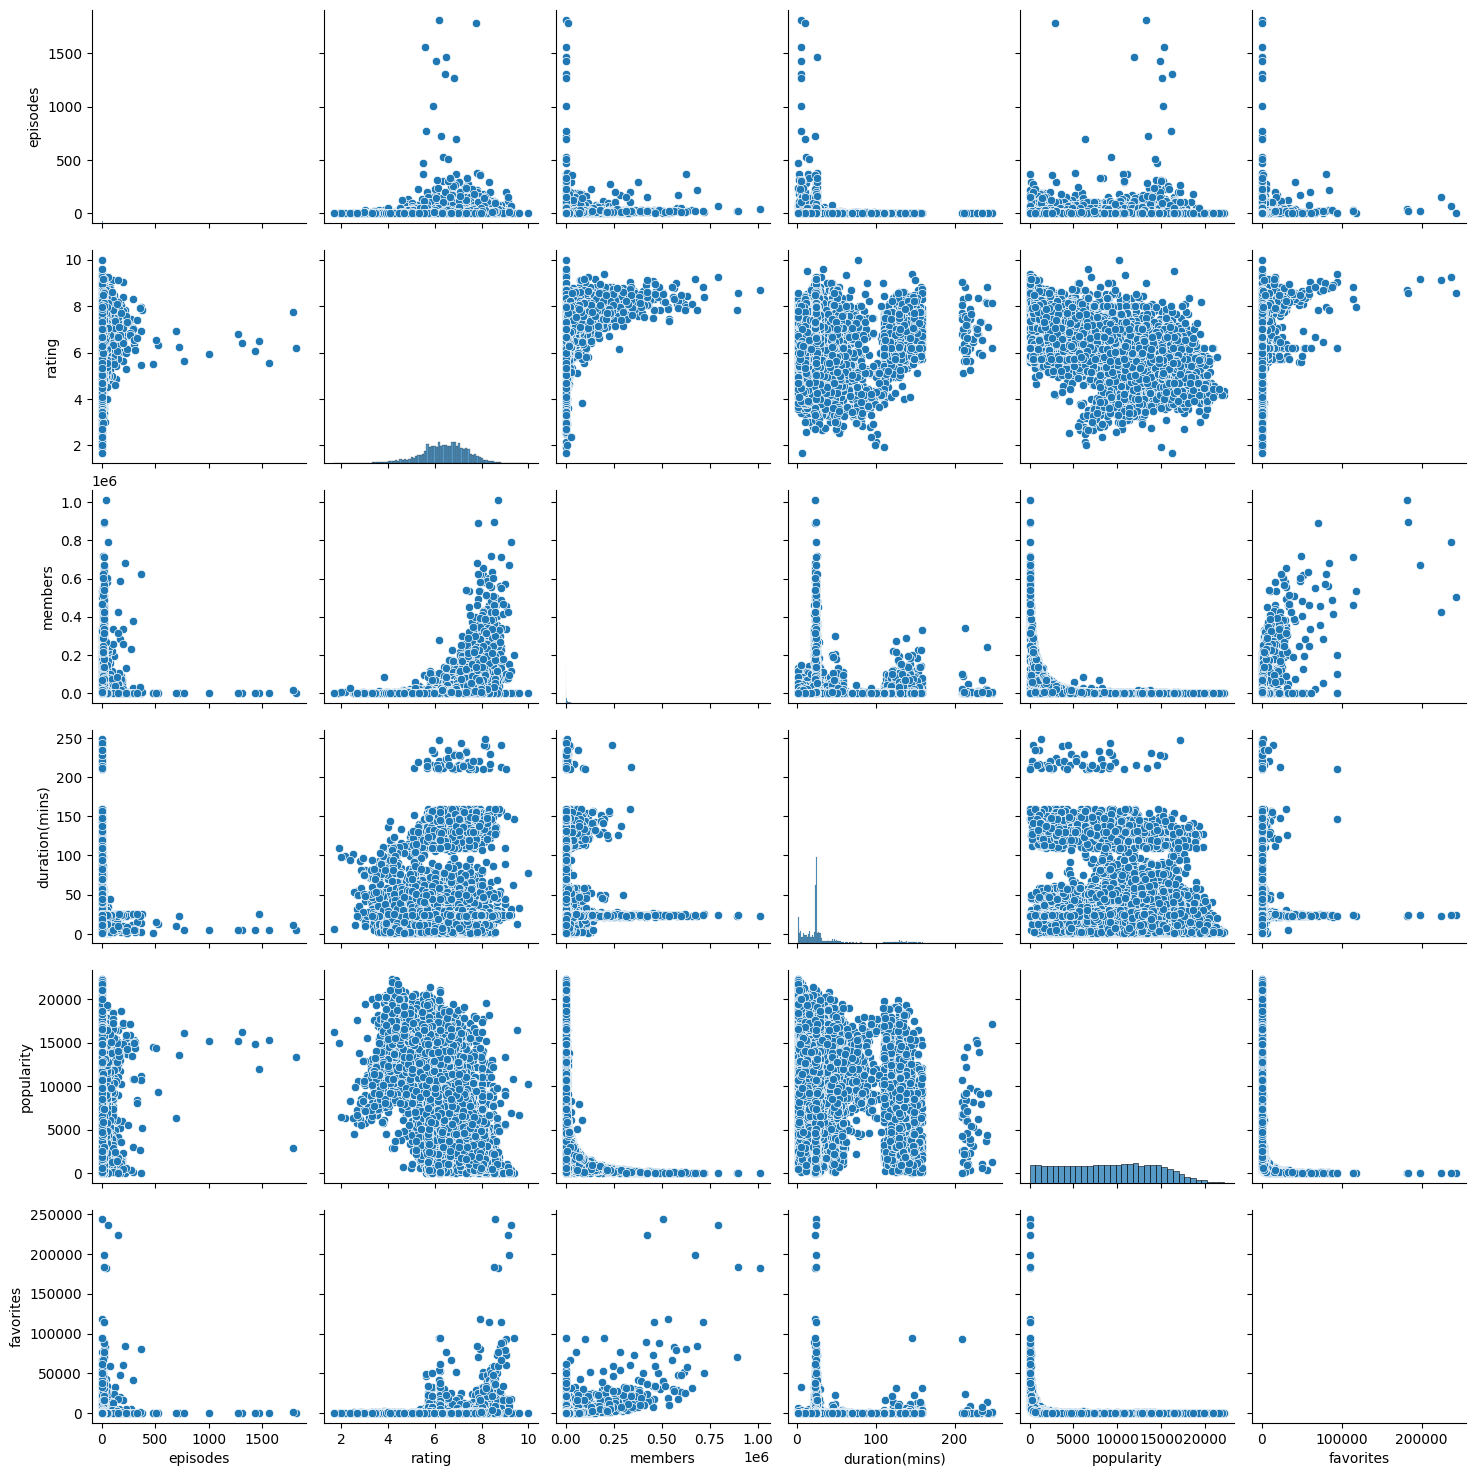

In [24]:
vars_to_compare = ["episodes", "rating", "members", "duration(mins)", "popularity", "favorites"]
pairwise = sns.pairplot(df, vars=vars_to_compare)

<Axes: >

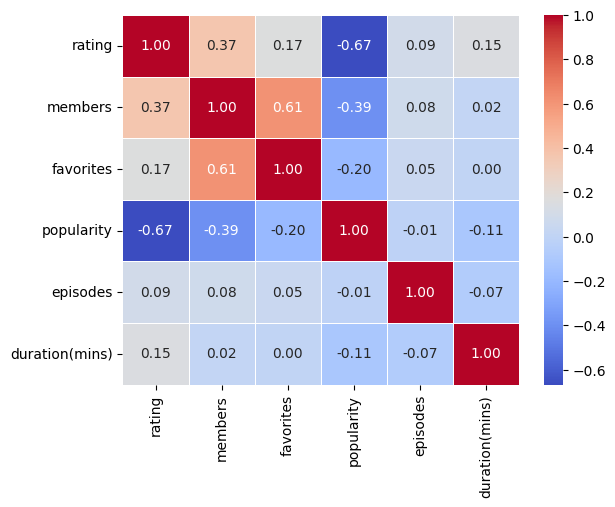

In [83]:
numeric_cols = ["rating", "members", "favorites", "popularity", "episodes", "duration(mins)"]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.6, cmap='coolwarm')

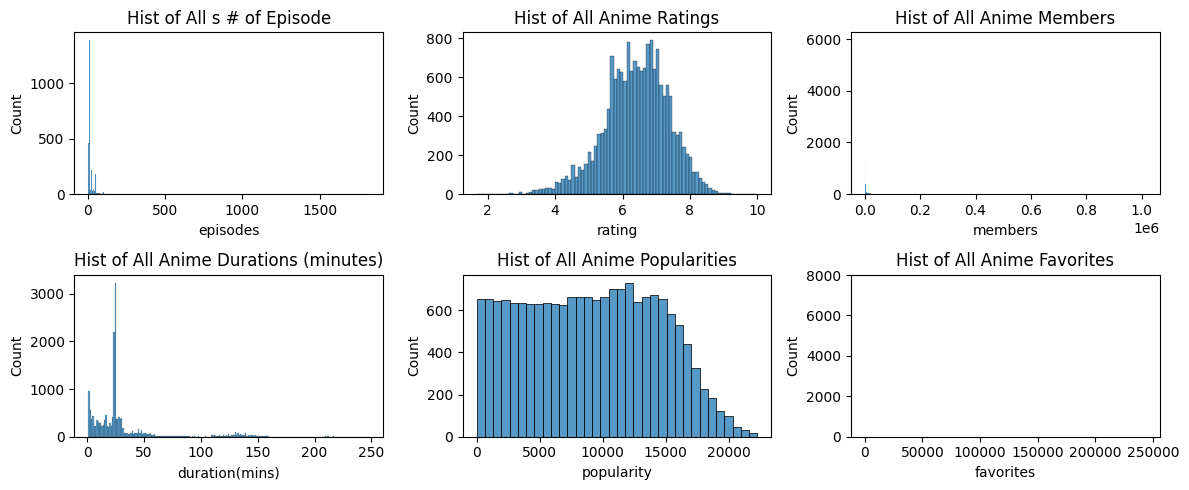

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

epdist = sns.histplot(df[df["episodes"]>4], x="episodes", ax=axes[0, 0])
epdist.set_title("Hist of All s # of Episode")

ratdist = sns.histplot(df, x="rating", ax=axes[0, 1])
ratdist.set_title("Hist of All Anime Ratings")

memdist = sns.histplot(df, x="members", ax=axes[0, 2])
memdist.set_title("Hist of All Anime Members")

popdist = sns.histplot(df, x="popularity", ax=axes[1, 1])
popdist.set_title("Hist of All Anime Popularities")

durdist = sns.histplot(df, x="duration(mins)", ax=axes[1, 0])
durdist.set_title("Hist of All Anime Durations (minutes)")

favdist = sns.histplot(df, x="favorites", ax=axes[1, 2])
favdist.set_title("Hist of All Anime Favorites")

plt.tight_layout()
plt.show()

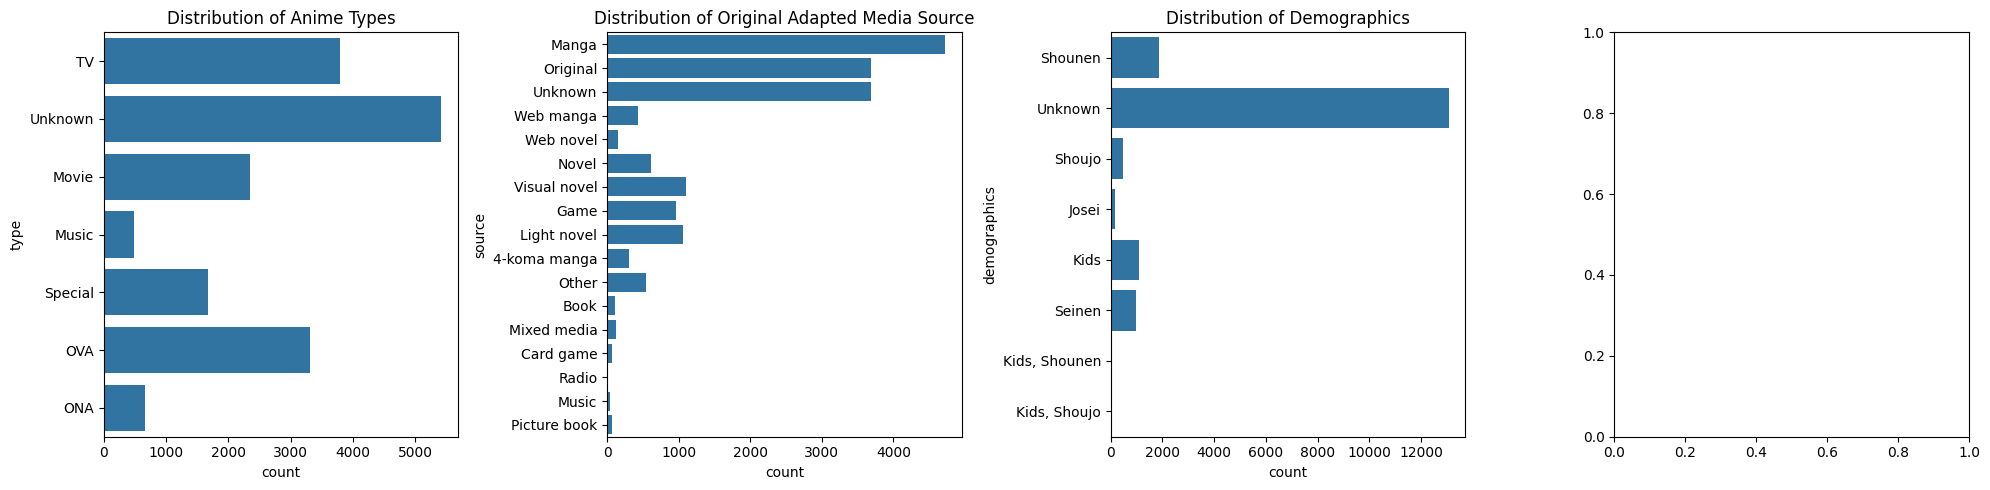

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.countplot(df, y="type", ax=axes[0]).set_title("Distribution of Anime Types")
sns.countplot(df, y="source", ax=axes[1]).set_title("Distribution of Original Adapted Media Source")
sns.countplot(df, y="demographics", ax=axes[2]).set_title("Distribution of Demographics")
plt.tight_layout()
plt.show()

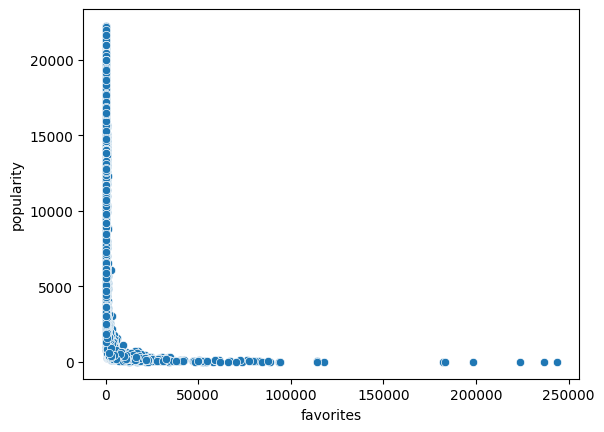

In [21]:
popscatter = sns.scatterplot(df, x="favorites", y="popularity")

[np.int64(1882), np.int64(13070), np.int64(463), np.int64(151), np.int64(1078), np.int64(991), np.int64(52), np.int64(2)]


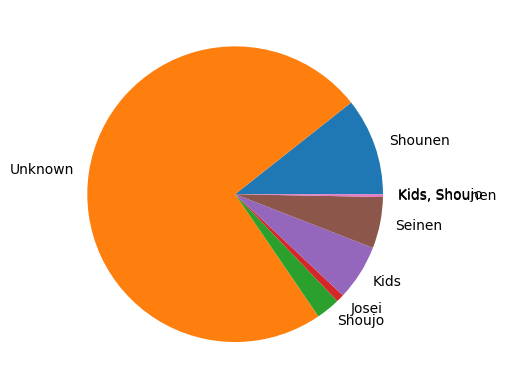

In [ ]:
demographicscounts = []
demographicnames = []
for demographic in df["demographics"].unique():
    demographicscounts.append(df[df["demographics"]==demographic]["demographics"].count())
    demographicnames.append(demographic)
print(demographicscounts)
demos = plt.pie(demographicscounts, labels = demographicnames)
demos
plt.show()

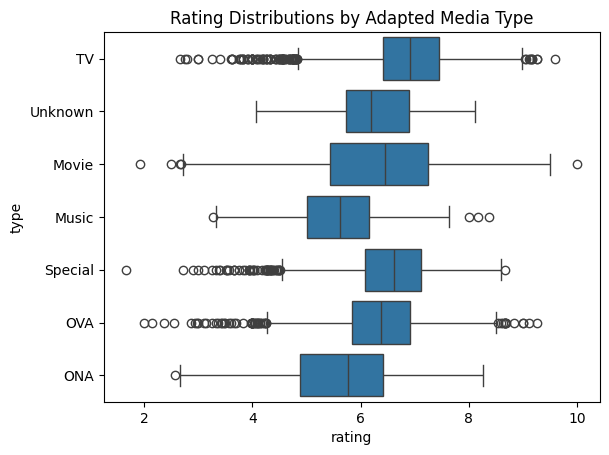

In [65]:
typevsrating = sns.boxplot(df, x="rating", y="type").set_title("Rating Distributions by Adapted Media Type")

In [128]:

alt.data_transformers.disable_max_rows()

brush = alt.selection_interval(encodings=["x"])

line = (alt.Chart(df).mark_line().encode(
        x=alt.Y("rating:Q", title="Rating"),
        color=alt.condition(brush, alt.value("steelblue"), alt.value("lightgray"))
    ).add_params(brush).properties(width=600, height=200, title="Select Range of Ratings to Display")
)


types = df["type"].unique().tolist()
demographics = df["demographics"].unique().tolist()
sources = df["source"].unique().tolist()


type_pie = (alt.Chart(df).mark_arc().encode(
        theta="count():Q",
        color=alt.Color(
            "type:N",
            title="Type",
            scale=alt.Scale(domain=types, scheme="set1")
        ),
        tooltip=["type", "count()"]
    ).transform_filter(brush).properties(width=250, height=250, title="Counts of Type")
)


demo_pie = (alt.Chart(df).mark_arc().encode(
        theta="count():Q",
        color=alt.Color(
            "demographics:N",
            title="Demographics",
            scale=alt.Scale(domain=demographics, scheme="set2")
        ),
        tooltip=["demographics", "count()"]
    ).transform_filter(brush).properties(width=250, height=250, title="Counts of Demographics")
)

source_pie = (alt.Chart(df).mark_arc().encode(
        theta="count():Q",
        color=alt.Color(
            "source:N",
            title="Source",
            scale=alt.Scale(domain=sources, scheme="tableau10"),
            legend=alt.Legend(orient="right")
        ),
        tooltip=["source", "count()"]
    ).transform_filter(brush).properties(width=250, height=250, title="Counts of Source")
)


layout = line & (type_pie | demo_pie | source_pie).resolve_scale(color="independent")
layout


alt.VConcatChart(...)